In [1]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 13.2 MB/s 


In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  


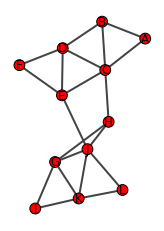

In [3]:
path = "/content/sample_data/exemplo_arvore.ncol"
graph = ig.Graph.Read_Ncol(path, weights = 'if_presents', directed = False)
graph.vs['label'] = graph.vs['name']
graph.es['label'] = graph.es['weight']
ig.plot(graph, target=plt.axes())
plt.axis('off')
plt.show()

In [4]:
import numpy as np
for g in graph.vs:
  print(g)

igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 0, {'name': 'A', 'label': 'A'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 1, {'name': 'B', 'label': 'B'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 2, {'name': 'C', 'label': 'C'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 3, {'name': 'D', 'label': 'D'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 4, {'name': 'E', 'label': 'E'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 5, {'name': 'H', 'label': 'H'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 6, {'name': 'F', 'label': 'F'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 7, {'name': 'J', 'label': 'J'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 8, {'name': 'G', 'label': 'G'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 9, {'name': 'I', 'label': 'I'})
igraph.Vertex(<igraph.Graph object at 0x7fcaecffa9e0>, 10, {'name': 'K', 'label': 'K'})
igraph.Vertex(<igraph.Graph object at 0x7f

In [5]:
def Boruvka(graph):
  forest = [[tree] for tree in range(len(graph.vs))]
  lider = [vertice for vertice in range(len(graph.vs))]
  adjacency_matrix = graph.get_adjacency('weight')
  edge_list = []

  primary_tree_index = 0
  secundary_tree_index = 0
  while len(forest) > 1:
    for primary_tree in forest:
      weight = np.inf

      for secundary_tree in forest:

        if primary_tree == secundary_tree: continue

        for primary_vertice in primary_tree:

          for secundary_vertice in secundary_tree:
            edge_weight = adjacency_matrix[primary_vertice][secundary_vertice]

            
            if edge_weight == 0: continue
            if edge_weight < weight:
              weight = edge_weight
              edge = (primary_vertice, secundary_vertice)
              auxiliar_tree = secundary_tree
              secundary_tree_index = forest.index(secundary_tree)

      forest[primary_tree_index] = list(set(primary_tree + auxiliar_tree))
      forest.pop(secundary_tree_index)
      edge_list.append(edge)
      primary_tree_index += 1

    primary_tree_index = 0
  
  return edge_list
  

edge_list = Boruvka(graph)
edge_list

[(0, 2),
 (1, 3),
 (4, 6),
 (5, 8),
 (7, 11),
 (9, 8),
 (2, 1),
 (6, 3),
 (8, 10),
 (4, 7),
 (10, 11)]